In [1]:
!pip install koreanize-matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 60.4 MB/s eta 0:00:00


데이터 컬럼: ['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']


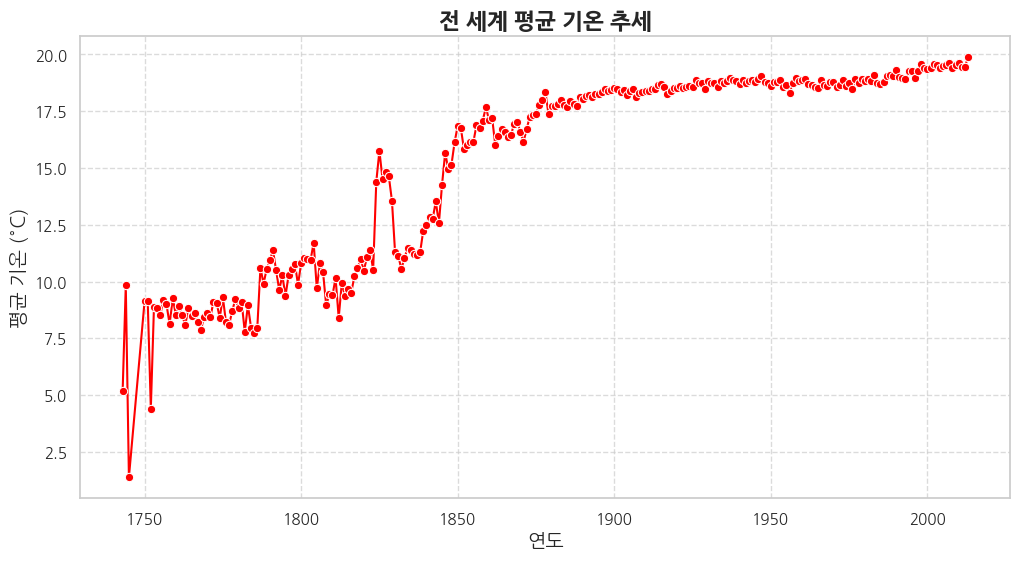

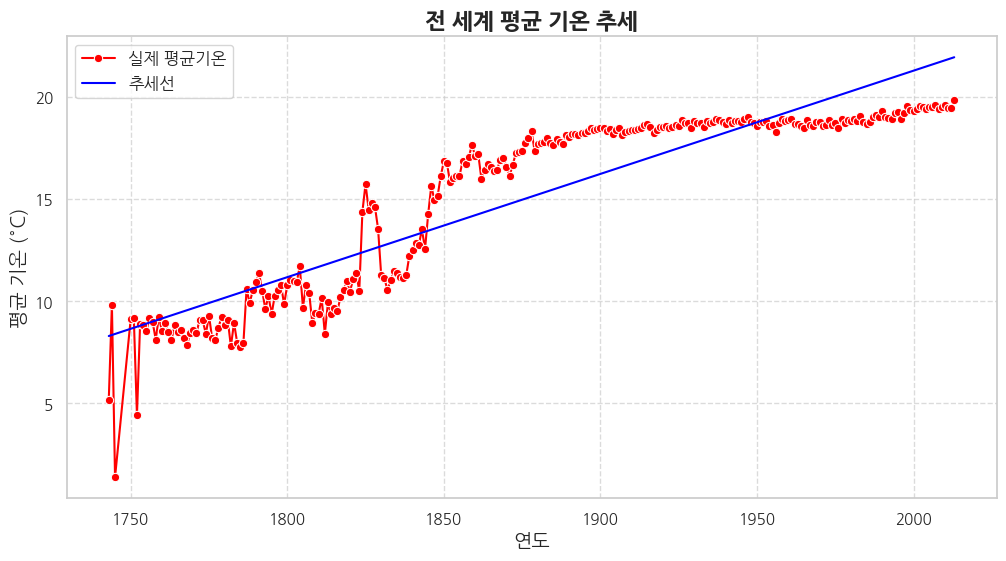

기후 변동 원인
엘니뇨,라니냐,화산분화,태양활동 등이 지구기온의 변동원인, 측정 방식,장비변화 및 오차, 데이터 불완전성 및 보정(과거의 데이터 품질 불량) ,장기추세+단기요인(연,계절,수년단위)


<ipython-input-8-8666470a1930>:72: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




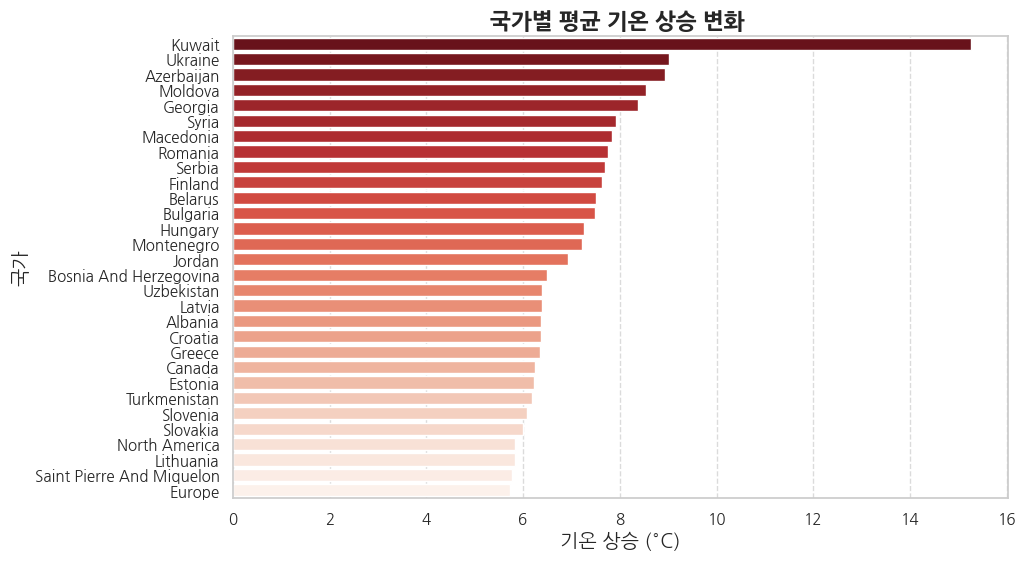

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import koreanize_matplotlib

# 1. 데이터 불러오기 및 전처리
df = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')

# 컬럼 확인
print("데이터 컬럼:", df.columns.tolist())
# 예상: ['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'Country']

# 'dt' 컬럼을 datetime 형식으로 변환하고 연도 추출
df['dt'] = pd.to_datetime(df['dt'], errors='coerce')
df['year'] = df['dt'].dt.year

# 결측치 제거: 평균 기온
df = df.dropna(subset=['AverageTemperature'])

# 2. 전 세계 평균 기온 추세 (라인 차트)
# 전 세계 데이터: 'Country'가 'World'인 경우가 아니라면, 모든 국가의 평균을 사용
df_global = df.groupby('year', as_index=False)['AverageTemperature'].mean()
df_global = df_global.sort_values('year').reset_index(drop=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=df_global, x='year', y='AverageTemperature', marker='o', color='red')
plt.title('전 세계 평균 기온 추세', fontsize=16, fontweight='bold')
plt.xlabel('연도', fontsize=14)
plt.ylabel('평균 기온 (°C)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# 3. 전 세계 온난화 추세 (회귀 추세선 포함)
X = df_global[['year']]
y = df_global['AverageTemperature']
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.figure(figsize=(12,6))
sns.lineplot(data=df_global, x='year', y='AverageTemperature', marker='o', color='red', label='실제 평균기온')
plt.plot(df_global['year'], y_pred, color='blue', label='추세선')
plt.title('전 세계 평균 기온 추세', fontsize=16, fontweight='bold')
plt.xlabel('연도', fontsize=14)
plt.ylabel('평균 기온 (°C)', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


print('기후 변동 원인')
print('엘니뇨,라니냐,화산분화,태양활동 등이 지구기온의 변동원인, 측정 방식,장비변화 및 오차, 데이터 불완전성 및 보정(과거의 데이터 품질 불량) ,장기추세+단기요인(연,계절,수년단위)')

# 4. 국가별 온도 상승 변화 (최초 vs. 최신 평균 기온 차이)
# 각 국가별로 연도별 평균 기온 계산
df_country = df.groupby(['Country', 'year'], as_index=False)['AverageTemperature'].mean()

# 각 국가별 첫 번째 기록과 마지막 기록을 추출
df_first = df_country.groupby('Country', as_index=False).first()
df_last = df_country.groupby('Country', as_index=False).last()

# 두 데이터프레임을 병합하여 온도 차이 계산
df_change = pd.merge(df_first, df_last, on='Country', suffixes=('_first', '_last'))
df_change['temp_change'] = df_change['AverageTemperature_last'] - df_change['AverageTemperature_first']

# 온도 상승이 가장 큰 상위 10개국 선택 (temp_change가 높은 순)
df_top10 = df_change.sort_values('temp_change', ascending=False).head(30)

plt.figure(figsize=(10,6))
sns.barplot(data=df_top10, x='temp_change', y='Country', palette='Reds_r')
plt.title('국가별 평균 기온 상승 변화 ', fontsize=16, fontweight='bold')
plt.xlabel('기온 상승 (°C)', fontsize=14)
plt.ylabel('국가', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.7)
plt.show()

W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 34 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (8,952 kB/s)
Selecting previously unselected package fonts-nanum.
(Reading database ... 125044 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20200506-1_all.deb ...
Unpacking fonts-nanum (20200506-1) ...
Setting up fonts-nanum (20200506-1) ...
Processing triggers for fontconfig (2.13.1-4.2ubuntu5) ...
데이터 컬럼: ['dt', 'AverageTemperatur

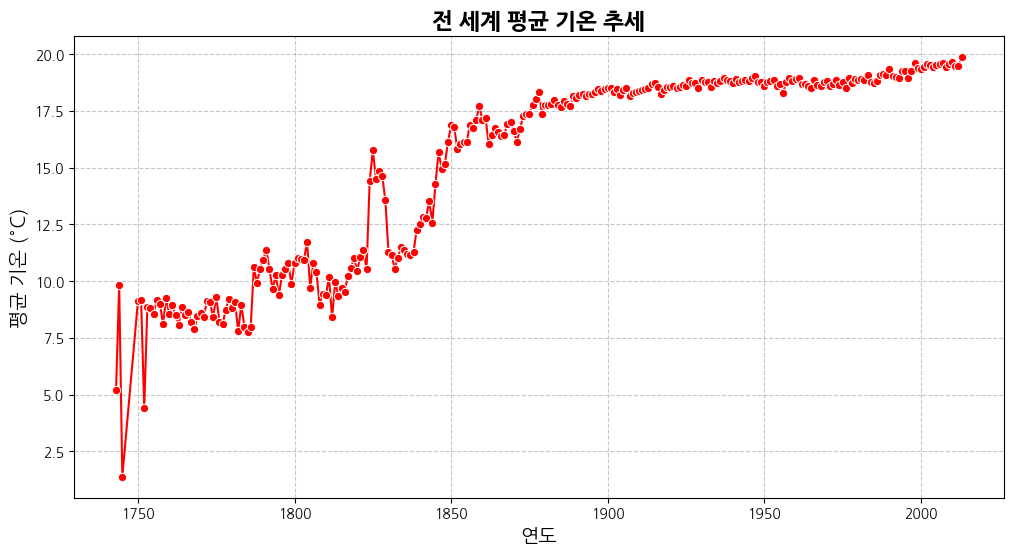

In [3]:
# 한글 폰트 설치 (Colab에서 NanumGothic 설치)
!apt-get update -qq
!apt-get install -y fonts-nanum

# matplotlib의 폰트 설정 (NanumGothic 사용)
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumGothic'

# 필요 패키지 임포트
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
import koreanize_matplotlib  # 이 모듈은 한글 깨짐을 보완하기 위한 옵션을 설정해 줍니다.

# 예시: 전 세계 평균 기온 추세 시각화 코드 (이전 코드와 동일)
df = pd.read_csv('/content/GlobalLandTemperaturesByCountry.csv')
print("데이터 컬럼:", df.columns.tolist())

df['dt'] = pd.to_datetime(df['dt'], errors='coerce')
df['year'] = df['dt'].dt.year
df = df.dropna(subset=['AverageTemperature'])
df_global = df.groupby('year', as_index=False)['AverageTemperature'].mean()
df_global = df_global.sort_values('year').reset_index(drop=True)

plt.figure(figsize=(12,6))
sns.lineplot(data=df_global, x='year', y='AverageTemperature', marker='o', color='red')
plt.title('전 세계 평균 기온 추세', fontsize=16, fontweight='bold')
plt.xlabel('연도', fontsize=14)
plt.ylabel('평균 기온 (°C)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


Global_sea_level_rise.csv 컬럼: ['year', 'date', 'mmfrom1993-2008average']
Global sea level 데이터 행 수: 141
   year        date   sea_level
0  1880  07/15/1880 -183.247396
1  1881  07/15/1881 -174.014062
2  1882  07/15/1882 -190.080729
3  1883  07/15/1883 -185.147396
4  1884  07/15/1884 -166.280729
arctic_ice_extent.csv 컬럼: ['year', 'extent']
Arctic ice extent 데이터 행 수: 44
   year  ice_extent
0  1979       6.903
1  1980       7.544
2  1981       6.903
3  1982       7.166
4  1983       7.221
Antartica_mass.csv 컬럼: ['year', 'Antarctic mass', 'Antarctic mass 1-sigma uncertainty']
Antarctica mass 데이터 행 수: 211
      year  ice_mass  Antarctic mass 1-sigma uncertainty
0  2002.29      0.00                              178.90
1  2002.35     23.70                              102.47
2  2002.62    -51.67                               83.09
3  2002.71     47.89                               97.19
4  2002.79     72.21                               61.82


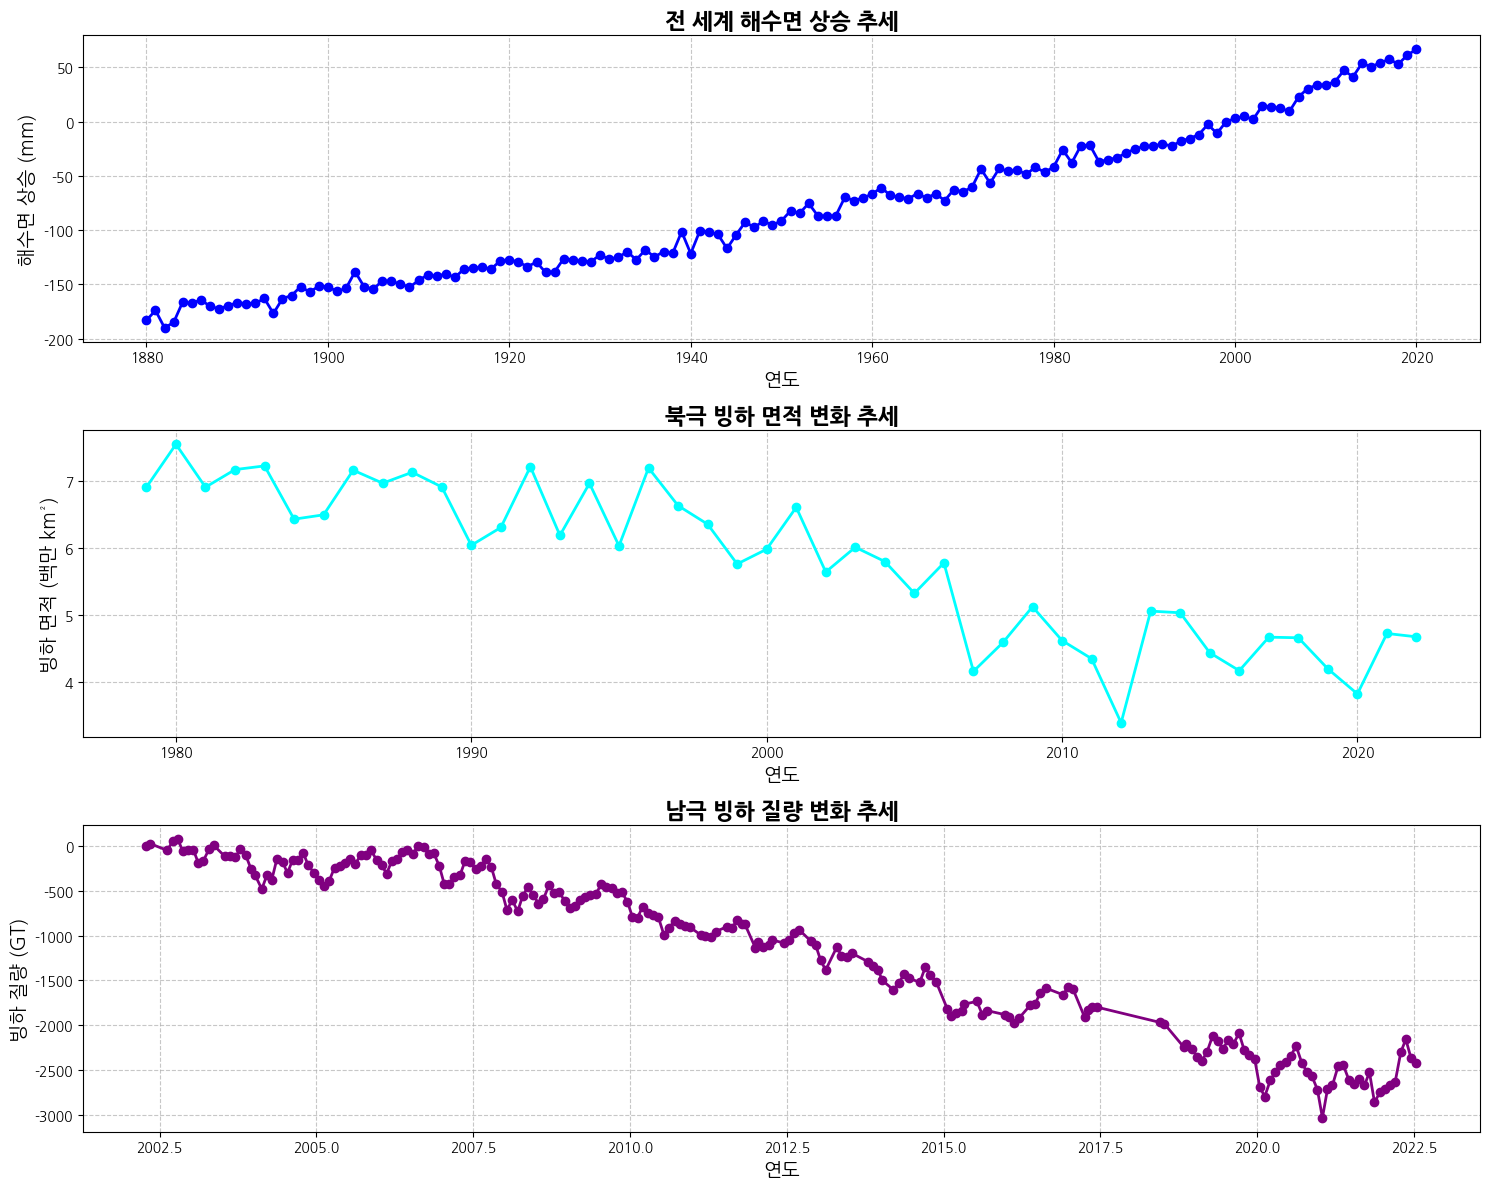

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

##############################################
# 1. Global Sea Level Rise 데이터 전처리
##############################################
df_sea = pd.read_csv('/content/Global_sea_level_rise.csv')
# 컬럼명 앞뒤 공백 제거
df_sea.columns = df_sea.columns.str.strip()
print("Global_sea_level_rise.csv 컬럼:", df_sea.columns.tolist())
# 예상 컬럼: ['year', 'date', 'mmfrom1993-2008average']
# 'mmfrom1993-2008average'를 'sea_level'로 변경
df_sea.rename(columns={'mmfrom1993-2008average': 'sea_level'}, inplace=True)
# 'year'를 숫자형으로 변환
df_sea['year'] = pd.to_numeric(df_sea['year'], errors='coerce')
# 결측치 제거 및 연도별 정렬
df_sea = df_sea.dropna(subset=['year', 'sea_level']).sort_values('year')
print("Global sea level 데이터 행 수:", len(df_sea))
print(df_sea.head())

##############################################
# 2. Arctic Ice Extent 데이터 전처리
##############################################
df_arctic = pd.read_csv('/content/arctic_ice_extent.csv')
df_arctic.columns = df_arctic.columns.str.strip()
print("arctic_ice_extent.csv 컬럼:", df_arctic.columns.tolist())
# 예상 컬럼: ['year', 'extent']
df_arctic.rename(columns={'extent': 'ice_extent'}, inplace=True)
df_arctic['year'] = pd.to_numeric(df_arctic['year'], errors='coerce')
df_arctic = df_arctic.dropna(subset=['year', 'ice_extent']).sort_values('year')
print("Arctic ice extent 데이터 행 수:", len(df_arctic))
print(df_arctic.head())

##############################################
# 3. Antarctic Mass 데이터 전처리
##############################################
df_antarctica = pd.read_csv('/content/Antartica_mass.csv')
df_antarctica.columns = df_antarctica.columns.str.strip()
print("Antartica_mass.csv 컬럼:", df_antarctica.columns.tolist())
# 예상 컬럼: ['year', 'Antarctic mass', 'Antarctic mass 1-sigma uncertainty']
# 'Antarctic mass'를 'ice_mass'로 변경 (불확실도 컬럼은 여기서는 사용하지 않음)
df_antarctica.rename(columns={'Antarctic mass': 'ice_mass'}, inplace=True)
# 'year'는 이미 있으므로 숫자형 변환
df_antarctica['year'] = pd.to_numeric(df_antarctica['year'], errors='coerce')
df_antarctica = df_antarctica.dropna(subset=['year', 'ice_mass']).sort_values('year')
print("Antarctica mass 데이터 행 수:", len(df_antarctica))
print(df_antarctica.head())

##############################################
# 4. 3개의 시계열 그래프 (서브플롯)
##############################################
plt.figure(figsize=(15, 12))

# (A) 전 세계 해수면 상승 추세
plt.subplot(3, 1, 1)
plt.plot(df_sea['year'], df_sea['sea_level'], marker='o', color='blue', linewidth=2)
plt.title('전 세계 해수면 상승 추세', fontsize=16, fontweight='bold')
plt.xlabel('연도', fontsize=14)
# 단위: mm (필요 시 cm로 변경)
plt.ylabel('해수면 상승 (mm)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# (B) 북극 빙하 면적 변화 추세
plt.subplot(3, 1, 2)
plt.plot(df_arctic['year'], df_arctic['ice_extent'], marker='o', color='cyan', linewidth=2)
plt.title('북극 빙하 면적 변화 추세', fontsize=16, fontweight='bold')
plt.xlabel('연도', fontsize=14)
plt.ylabel('빙하 면적 (백만 km²)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# (C) 남극 빙하 질량 변화 추세
plt.subplot(3, 1, 3)
plt.plot(df_antarctica['year'], df_antarctica['ice_mass'], marker='o', color='purple', linewidth=2)
plt.title('남극 빙하 질량 변화 추세', fontsize=16, fontweight='bold')
plt.xlabel('연도', fontsize=14)
plt.ylabel('빙하 질량 (GT)', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


In [5]:
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio

# Colab에서 Plotly 그래프가 제대로 표시되도록 렌더러 설정
pio.renderers.default = "colab"

# -------------------------------------------------
# 1. Global Sea Level Rise 데이터 전처리
# -------------------------------------------------
df_sea = pd.read_csv('/content/Global_sea_level_rise.csv')
df_sea.columns = df_sea.columns.str.strip()  # 컬럼명 앞뒤 공백 제거
# 예상 컬럼: ['year', 'date', 'mmfrom1993-2008average']
df_sea.rename(columns={'mmfrom1993-2008average': 'sea_level'}, inplace=True)
df_sea['year'] = pd.to_numeric(df_sea['year'], errors='coerce')
df_sea = df_sea.dropna(subset=['year', 'sea_level']).sort_values('year')
# 해당 데이터셋의 최소 연도와 최대 연도
sea_min_year = int(df_sea['year'].min())
sea_max_year = int(df_sea['year'].max())

# -------------------------------------------------
# 2. Arctic Ice Extent 데이터 전처리
# -------------------------------------------------
df_arctic = pd.read_csv('/content/arctic_ice_extent.csv')
df_arctic.columns = df_arctic.columns.str.strip()
# 예상 컬럼: ['year', 'extent']
df_arctic.rename(columns={'extent': 'ice_extent'}, inplace=True)
df_arctic['year'] = pd.to_numeric(df_arctic['year'], errors='coerce')
df_arctic = df_arctic.dropna(subset=['year', 'ice_extent']).sort_values('year')
arctic_min_year = int(df_arctic['year'].min())
arctic_max_year = int(df_arctic['year'].max())

# -------------------------------------------------
# 3. Antarctic Mass 데이터 전처리
# -------------------------------------------------
df_antarctica = pd.read_csv('/content/Antartica_mass.csv')
df_antarctica.columns = df_antarctica.columns.str.strip()
# 예상 컬럼: ['year', 'Antarctic mass', 'Antarctic mass 1-sigma uncertainty']
df_antarctica.rename(columns={'Antarctic mass': 'ice_mass'}, inplace=True)
df_antarctica['year'] = pd.to_numeric(df_antarctica['year'], errors='coerce')
df_antarctica = df_antarctica.dropna(subset=['year', 'ice_mass']).sort_values('year')
anta_min_year = int(df_antarctica['year'].min())
anta_max_year = int(df_antarctica['year'].max())

# -------------------------------------------------
# 4. Plotly Subplots 생성 (각각 별도의 그래프)
# -------------------------------------------------
fig = make_subplots(rows=3, cols=1,
                    subplot_titles=("전 세계 해수면 상승 추세", "북극 빙하 면적 변화 추세", "남극 빙하 질량 변화 추세"))

# (A) 전 세계 해수면 상승 추세 (라인 차트)
fig.add_trace(
    go.Scatter(
        x=df_sea['year'],
        y=df_sea['sea_level'],
        mode='lines+markers',
        name='해수면 상승',
        line=dict(color='blue', width=3),
        marker=dict(size=8)
    ),
    row=1, col=1
)
fig.update_yaxes(title_text="해수면 상승 (mm)", row=1, col=1)
fig.update_xaxes(title_text="연도", row=1, col=1)

# (B) 북극 빙하 면적 변화 추세 (라인 차트)
fig.add_trace(
    go.Scatter(
        x=df_arctic['year'],
        y=df_arctic['ice_extent'],
        mode='lines+markers',
        name='빙하 면적',
        line=dict(color='cyan', width=3),
        marker=dict(size=8)
    ),
    row=2, col=1
)
fig.update_yaxes(title_text="빙하 면적 (백만 km²)", row=2, col=1)
fig.update_xaxes(title_text="연도", row=2, col=1)

# (C) 남극 빙하 질량 변화 추세 (라인 차트)
fig.add_trace(
    go.Scatter(
        x=df_antarctica['year'],
        y=df_antarctica['ice_mass'],
        mode='lines+markers',
        name='빙하 질량',
        line=dict(color='purple', width=3),
        marker=dict(size=8)
    ),
    row=3, col=1
)
fig.update_yaxes(title_text="빙하 질량 (GT)", row=3, col=1)
fig.update_xaxes(title_text="연도", row=3, col=1)

# 전체 레이아웃 업데이트
fig.update_layout(
    height=900,
    width=1000,
    title_text="지구온난화 관련 시계열 데이터",
    showlegend=False
)

fig.show()
print('빙하 면적은 우하향이 아닌 왔다갔다 한다. 이유는 계절적 요인과, 기후변동성이 있다. 겨울에 얼고, 여름에 언다. 엘니뇨, 라니냐등 여러 기후패턴으로 인해 변동이 있다.')

빙하 면적은 우하향이 아닌 왔다갔다 한다. 이유는 계절적 요인과, 기후변동성이 있다. 겨울에 얼고, 여름에 언다. 엘니뇨, 라니냐등 여러 기후패턴으로 인해 변동이 있다.


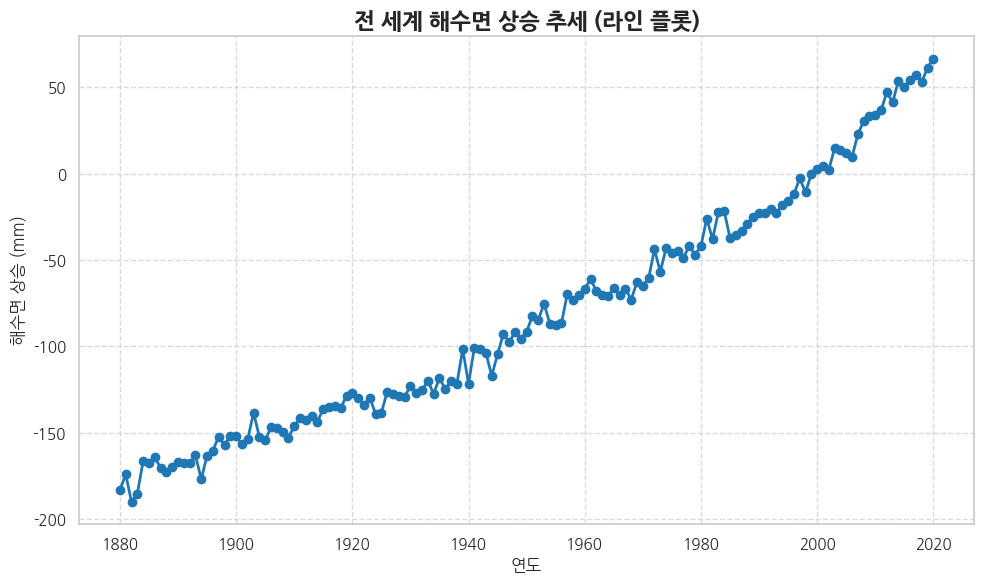

주석: 해수면 상승값은 '1993~2008년 평균 해수면 높이'를 0으로 삼아, 그 전후의 변화를 측정한 데이터입니다.


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Seaborn 테마와 NanumGothic 폰트 설정
sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기 및 전처리
df_sea = pd.read_csv('/content/Global_sea_level_rise.csv')
df_sea.columns = df_sea.columns.str.strip()  # 컬럼명 공백 제거
df_sea.rename(columns={'mmfrom1993-2008average': 'sea_level'}, inplace=True)
df_sea['year'] = pd.to_numeric(df_sea['year'], errors='coerce')
df_sea = df_sea.dropna(subset=['year', 'sea_level']).sort_values('year')

# 2. 라인 플롯 시각화
plt.figure(figsize=(10,6))
plt.plot(df_sea['year'], df_sea['sea_level'], marker='o', linestyle='-', linewidth=2, color='#1f77b4')
plt.title('전 세계 해수면 상승 추세 (라인 플롯)', fontsize=16, fontweight='bold')
plt.xlabel('연도', fontsize=12)
plt.ylabel('해수면 상승 (mm)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("주석: 해수면 상승값은 '1993~2008년 평균 해수면 높이'를 0으로 삼아, 그 전후의 변화를 측정한 데이터입니다.")


<ipython-input-7-9a60aa19aaee>:29: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




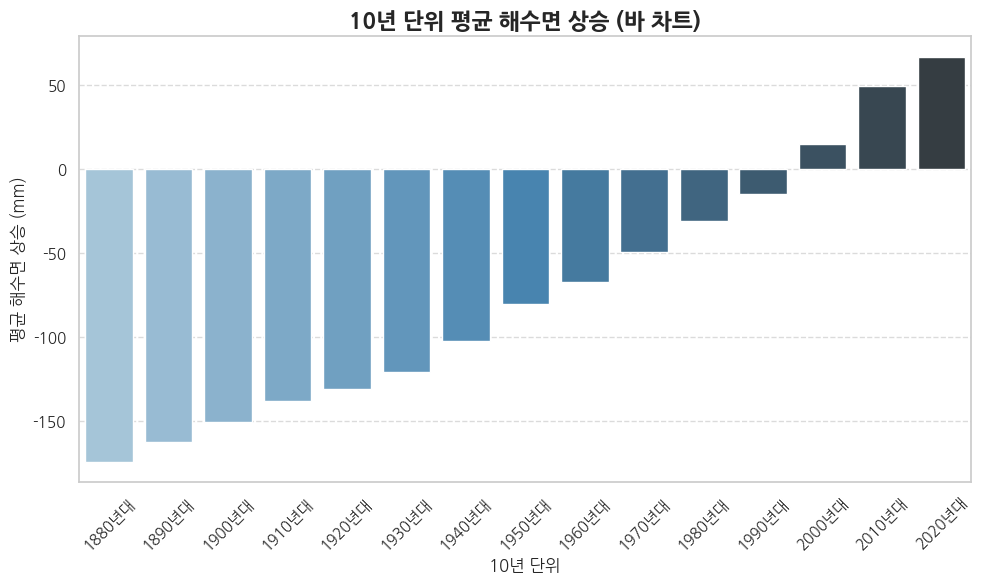

주석: 10년 단위 평균 해수면 상승은 '1993~2008년 평균 해수면 높이'를 0으로 삼았으며,
해당 기준보다 낮으면 음수, 높으면 양수로 표시됩니다.
10년 단위 평균 해수면 상승 : 측정 기준을 1993~2008로 잡았다. 인공위성 고도계가 본격적 활용된 시기가 1993이다. 이 이후부터 해수면 자료가 측정되기 시작해서 기준으로 삼았다. 


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# Seaborn 테마와 NanumGothic 폰트 설정
sns.set_theme(style="whitegrid", font="NanumGothic")
plt.rcParams['axes.unicode_minus'] = False

# 1. 데이터 불러오기 및 전처리
df_sea = pd.read_csv('/content/Global_sea_level_rise.csv')
df_sea.columns = df_sea.columns.str.strip()
df_sea.rename(columns={'mmfrom1993-2008average': 'sea_level'}, inplace=True)
df_sea['year'] = pd.to_numeric(df_sea['year'], errors='coerce')
df_sea = df_sea.dropna(subset=['year', 'sea_level']).sort_values('year')

# 2. 10년 단위 열 생성
df_sea['decade'] = (df_sea['year'] // 10) * 10

# 3. 10년 단위 평균 해수면 상승 계산
df_decade = df_sea.groupby('decade', as_index=False)['sea_level'].mean()
df_decade = df_decade.sort_values('decade').reset_index(drop=True)

# 라벨(문자열)로 변환: 예) 1880 → "1880년대"
df_decade['decade_label'] = df_decade['decade'].astype(str) + '년대'

# 4. 바 차트 시각화
plt.figure(figsize=(10,6))
sns.barplot(data=df_decade, x='decade_label', y='sea_level', palette='Blues_d')
plt.title('10년 단위 평균 해수면 상승 (바 차트)', fontsize=16, fontweight='bold')
plt.xlabel('10년 단위', fontsize=12)
plt.ylabel('평균 해수면 상승 (mm)', fontsize=12)
plt.xticks(rotation=45)  # x축 라벨 겹침 방지
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print("주석: 10년 단위 평균 해수면 상승은 '1993~2008년 평균 해수면 높이'를 0으로 삼았으며,")
print("해당 기준보다 낮으면 음수, 높으면 양수로 표시됩니다.")
print('10년 단위 평균 해수면 상승 : 측정 기준을 1993~2008로 잡았다. 인공위성 고도계가 본격적 활용된 시기가 1993이다. 이 이후부터 해수면 자료가 측정되기 시작해서 기준으로 삼았다. ')